Naive Bayes classifier is one of the ML algorithms used in classification setting. It is based on the concept of Bayes theorem which in turn is based on the concept of Conditional Probability. Conditional probability basically finds the probability that an event will happen given that another event has already happened. One should also note that the two events are dependent events and not independent events. 

**Conditional Probability** 

The below formula gives the conditional probability of event A happening given that or when it is known that event B has already happened. This is derived from the knowledge of probability of both events happening. 
                                            
                                                       (P(AandB))
                                             P(A|B) = ------------
                                                          P(B)

**Bayes Theorem**

We know from Conditional Probability that P(A|B) = (P(AandB))/P(B), also P(B|A) = (P(BandA))/P(A). Now P(AandB) and P(BandA) is nothing but the intersection of events A and B. Hence equating the two equations above, we get the Bayes theorem formula as below,

                                                     ((P(B|A)*P(A))
                                            P(A|B) = --------------
                                                         P(B))
                                            
It should also be noted that Bayes theorem is not restricted to Binary classification, it can also be used in case of Multiclass Classification problem. It is one of the simplest algorithms which is quite often used in **Text Classification**, **Spam detection** and some other scenarios. 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,f1_score,plot_confusion_matrix
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [15]:
train = pd.read_csv("train_LZdllcl.csv")
test  = pd.read_csv("test_2umaH9m.csv")

In [16]:
train.shape, test.shape

((54808, 14), (23490, 13))

In [17]:
train.drop("employee_id",axis=1,inplace=True)
test.drop("employee_id",axis=1,inplace=True)

In [18]:
train.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [19]:
test.head(3)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47


##### Missing Values

In [20]:
train.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
test.isna().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [22]:
# Education and Previous_Year_Rating seem to have missing values

#### EDA

In [23]:
train['is_promoted'].value_counts(dropna=False)/len(train)
# This is a case of Imbalanced classification.

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

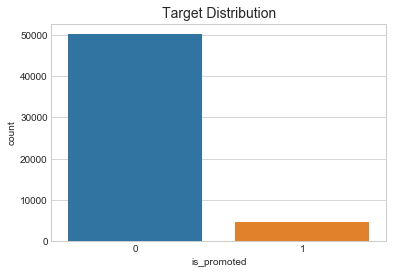

In [24]:
sns.countplot(train['is_promoted']);
plt.title("Target Distribution", fontsize=14);

In [25]:
# Let's check the value counts in categorical variables

In [26]:
for col in train.columns:
    if train[col].dtype=="object":
        print ("Number of Unique Values in {} Variable: {}".format(col,train[col].nunique()))

Number of Unique Values in department Variable: 9
Number of Unique Values in region Variable: 34
Number of Unique Values in education Variable: 3
Number of Unique Values in gender Variable: 2
Number of Unique Values in recruitment_channel Variable: 3


In [27]:
for col in train.columns:
    if train[col].dtype=="object":
        print ("Value Counts in {} Variable:\n{}".format(col,train[col].value_counts(dropna=False)))
        print ("------------------------------------")
        
# Looks like the cardinality of  region variable is high as compared to other variables

Value Counts in department Variable:
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
------------------------------------
Value Counts in region Variable:
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33  

In [28]:
# Let's segregate the categorical columns and numerical columns.
cat_cols = ['department',
           'region',
           'education',
           'gender',
           'recruitment_channel']
numerical_cols = [col for col in train.columns if col not in cat_cols]

In [29]:
# Let's fill the missing values in Education variable with a separate value rather than the mode imputation
for df in [train,test]:
    df['education'].fillna("Missing",inplace=True)

In [30]:
# Let's check the numerical variables

In [31]:
train.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


1. We can see the minumum number of trainings attended is 1 and maximum is 10, the median is 1 too. 
2. The minimum age is 20 and maximum is 60 with the average age of 34. 
3. The minimum previous_year_rating is 1 and maximum is 5. Average rating is 3.3. This variable has missing values.
4. Minimum service length is 1 year and maximum is 37 years. The average length of service is 5.86 ~ 6 years.
5. Only around 35% of the employees have met the Key Performance Indicators. Rest have not.
6. Hardly 2% of the employees have won an award. 
7. Minimum average training score is 39 and maximum is 99 with average being 63. 

In [32]:
for df in [train,test]:
    df['New_Join'] = np.where(df['previous_year_rating'].isna(),1,0)
    df['previous_year_rating'].fillna(999,inplace=True)

In [33]:
# Let'scheck the missing values after imputation

In [34]:
train.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
New_Join                0
dtype: int64

In [35]:
test.isna().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
New_Join                0
dtype: int64

Machine Learning algorithms expect the data that we input to be numerical in nature. Hence it is necessary to convert the categorical variables to numerical variables either by LabelEncoding them or by using OneHotEncoding, we will use LabelEncoding here. Also the numerical variables can be converted to same scale either by using StandardScaler or MinMaxScaler from the sklearn library. 

In [36]:
cat_cols = [col for col in train.columns if train[col].dtype=="object"]
numerical_cols = [col for col in train.columns if (train[col].dtype!="object") & (col!="is_promoted")]

In [37]:
# Since region has high cardinality, we will label encode the variable and create dummy variables for other categotical columns

le = LabelEncoder()
train['region'] = le.fit_transform(train['region'])
test['region'] = le.fit_transform(test['region'])

train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [38]:
train.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,New_Join,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,31,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,1,0,0,0,1
1,14,1,30,5.0,4,0,0,60,0,0,...,0,1,0,0,0,0,1,1,0,0
2,10,1,34,3.0,7,0,0,50,0,0,...,0,1,0,0,0,0,1,0,0,1
3,15,2,39,1.0,10,0,0,50,0,0,...,0,1,0,0,0,0,1,1,0,0
4,18,1,45,3.0,2,0,0,73,0,0,...,1,1,0,0,0,0,1,1,0,0


In [39]:
test.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,New_Join,department_Analytics,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Missing,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,18,1,24,999.0,1,1,0,77,1,0,...,1,1,0,0,0,0,1,0,0,1
1,28,1,31,3.0,5,0,0,51,0,0,...,0,1,0,0,0,1,0,1,0,0
2,4,1,31,1.0,4,0,0,47,0,0,...,0,1,0,0,0,0,1,1,0,0
3,11,3,31,2.0,9,0,0,65,0,0,...,0,1,0,0,0,1,0,1,0,0
4,21,1,30,4.0,7,0,0,61,0,0,...,0,1,0,0,0,0,1,0,0,1


#### Modelling using Naive Bayes Classifier

In [40]:
# Splitting using train_test_split

In [41]:
X = train[[col for col in train.columns if col!="is_promoted"]]
y = train['is_promoted']
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
print ("X_Train Data Shape:",X_Train.shape)
print ("y_Train Data Shape:",y_Train.shape)
print ("X_Test Data Shape:",X_Test.shape)
print ("y_Test Data Shape:",y_Test.shape)

X_Train Data Shape: (43846, 27)
y_Train Data Shape: (43846,)
X_Test Data Shape: (10962, 27)
y_Test Data Shape: (10962,)


In [42]:
y_Train.value_counts()/len(y_Train)

0    0.914838
1    0.085162
Name: is_promoted, dtype: float64

In [43]:
y_Test.value_counts()/len(y_Test)

0    0.914797
1    0.085203
Name: is_promoted, dtype: float64

In [44]:
# The competition score is F1-Score, which is the Harmonic mean of Precision and Recall values, we will use the same metric

In [45]:
cls = GaussianNB()
cls.fit(X_Train,y_Train)
train_preds = cls.predict(X_Train)
test_preds = cls.predict(X_Test)
print ("Training F1 Score:",f1_score(y_Train,train_preds))
print ("Testing F1 Score:",f1_score(y_Test,test_preds))

GaussianNB(priors=None, var_smoothing=1e-09)

Training F1 Score: 0.21878798402500432
Testing F1 Score: 0.2415196743554952


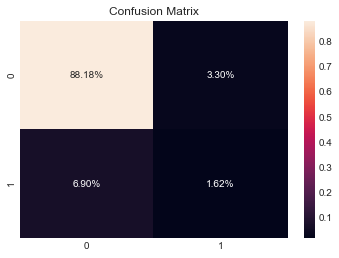

In [46]:
matrix = confusion_matrix(y_Test,test_preds);
sns.heatmap(matrix/np.sum(matrix),annot=True,fmt='.2%');
plt.title("Confusion Matrix");

We can see from the above confusion matrix that,

1. 88.18%% of the values are correctly predicted as Not Promoted, this is **True Negatives.**
2. 1.62% of the values are correctly predicted as Predicted, this is **True Positives.**
3. 6.90% of the values are incorrectly predicted as Not Promoted when they are actually promoted, this is **False Negatives.**
4. 3.30% of the values are incorrectly predicted as Promoted when the are Not Promoted, this is **False Positives.**

We can see from the F1 Score that the model didn't do any better than the Logistic Regression model we built in the other repository (https://github.com/kulkarni-vishwanath/Basics_ML/blob/master/Logistic_Regression/LogisticRegression.ipynb). This is because Naive Bayes method is known to be a Naive method as it assumes that there is no interaction among the variables, which is in fact not true in case of real world data. One can also note that this method is purely based on Probabilities and there are no coefficients that are calculated using various optimization techniques. 